Machine Learning Project : Regression Analysis

In [57]:
# Import time
import time

# Import Data Manipulation libraries
import numpy as np
import pandas as pd

# Import Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import filter warnings libraries
import warnings
warnings.filterwarnings('ignore')

#Import logging libraries
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log',
                    force = True)

# Import the scikit-learn libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 

In [58]:
# Step 2: Import dataset

data = pd.DataFrame({
    'feature1': np.random.randint(0, 10000, 1000),
    'feature2': np.random.randint(0, 30, 1000),
    'feature3': np.random.randint(20, 10000, 1000),
    'target': np.random.randint(0, 100, 1000)
})

In [59]:
# Steo 3: Checking dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  1000 non-null   int64
 1   feature2  1000 non-null   int64
 2   feature3  1000 non-null   int64
 3   target    1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


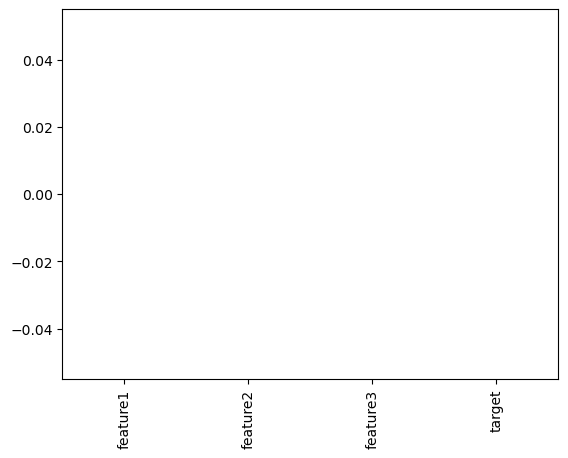

In [60]:
# Step 4: Checking null values in dataset
data.isnull().sum().plot(kind = 'bar')
plt.show()

In [61]:
# Step 4: EDA

from collections import OrderedDict

stats = []

for i in data.columns:
    numerical_stats = OrderedDict({
        'feature': i,
        'mean': data[i].mean(),
        'median': data[i].median(),
        'min': data[i].min(),
        'max': data[i].max(),
        'range': data[i].max() - data[i].min(),
        'Q1': data[i].quantile(0.25),
        'Q3': data[i].quantile(0.75),
        'IQR': data[i].quantile(0.75) - data[i].quantile(0.25),
        'Skewness': data[i].skew(),
        'Kurtosis': data[i].kurt()
        })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report

,feature,mean,median,min,max,range,Q1,Q3,IQR,Skewness,Kurtosis
0,feature1,4951.553,5097.0,5,9998,9993,2250.50,7494.75,5244.25,-0.021638,-1.255580
1,feature2,14.431,14.0,0,29,29,7.00,22.00,15.00,0.010327,-1.221968
2,feature3,5063.157,5006.5,31,9985,9954,2768.25,7455.25,4687.00,-0.029394,-1.123323
3,target,50.582,50.0,0,99,99,26.00,74.00,48.00,-0.013343,-1.197666


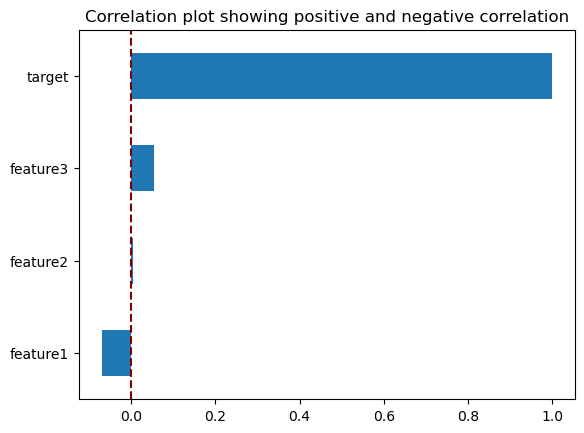

In [62]:
# Checking the correlation of feature w.r.t target column

data.corr()['target'].plot(kind = 'barh')
plt.axvline(0, linestyle = '--', color = 'maroon')
plt.title('Correlation plot showing positive and negative correlation')
plt.show()

In [63]:
start = time.time()

In [64]:
end = time.time()

In [65]:
time = end - start
logging.info(f'Time taken : {time} seconds')
time

0.007400989532470703

In [66]:
# step 6: Model Building

X = data.drop(columns = 'target', axis = 1) # Independent column

y = data['target'] # Dependent column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42) # Maximum value of random state is 0 to 4294967295

# Fit is always done with training data
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
# Linear Regression
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression().fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

r2_score(y_test, y_pred_lr)


0.0047812352690882465

<Axes: xlabel='target'>

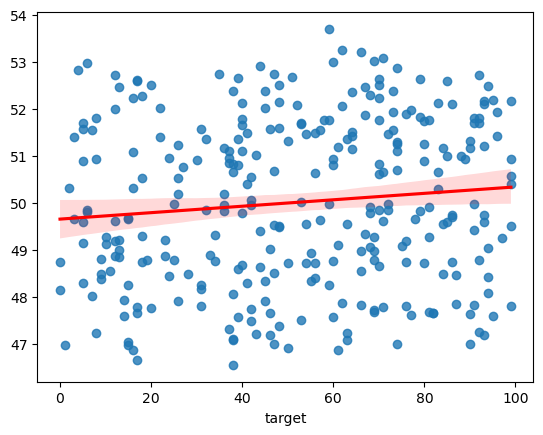

In [68]:
sns.regplot(x = y_test, y = y_pred_lr, line_kws = {'color': 'red'})

In [69]:
 
""" from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=1.0).fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
r2_score(y_test, y_pred_ridge)

# 3. Lasso Regression
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=1.0).fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)
r2_score(y_test, y_pred_lasso) """


' from sklearn.linear_model import Ridge\nmodel_ridge = Ridge(alpha=1.0).fit(X_train, y_train)\ny_pred_ridge = model_ridge.predict(X_test)\nr2_score(y_test, y_pred_ridge)\n\n# 3. Lasso Regression\nfrom sklearn.linear_model import Lasso\nmodel_lasso = Lasso(alpha=1.0).fit(X_train, y_train)\ny_pred_lasso = model_lasso.predict(X_test)\nr2_score(y_test, y_pred_lasso) '

In [70]:
from sklearn.linear_model import Ridge

model_ridge = Ridge().fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
r2_score(y_test, y_pred_ridge)

0.0046903981890927815

<Axes: xlabel='target'>

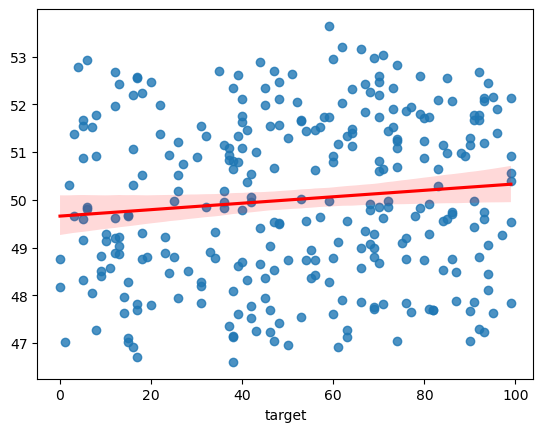

In [71]:
sns.regplot(x = y_test, y = y_pred_ridge, line_kws = {'color': 'red'})

In [72]:
# Lasso regression

from sklearn.linear_model import Lasso

model_lasso = Lasso().fit(X_train, y_train)

y_pred_lasso = model_lasso.predict(X_test)

r2_score(y_test, y_pred_lasso)

-0.005092802145305386

In [73]:
# ElasticNet

from sklearn.linear_model import ElasticNet

model_elastic = ElasticNet().fit(X_train, y_train)

y_pred_Elastic = model_elastic.predict(X_test)

r2_score(y_test, y_pred_Elastic)

-0.004951422366672675